In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

#import BanditProblems as bp

In [13]:
from gp_tk import RBF
from gp_tk import GP
from gp_tk import BP

In [14]:
x = np.linspace(0, 1, 101)

In [15]:
def sample(x):
    return st.bernoulli(0.5 * np.exp(-np.square((x-0.2)/0.2))).rvs()

In [16]:
def thompson_sampling(sample, model, n_trial=100, n_sample=100):
    xout = []
    yout = []
    for i in range(n_trial):
        xdist = np.sort(st.uniform().rvs(n_sample))
        dist = model.dist(xdist)
        p = dist.rvs()
        x = xdist[np.argmax(p)]
        y = sample(x)
        model.append(x, y)
        xout.append(x)
        yout.append(y)
    return xout, yout

In [53]:
model = GP(0.5, 0.1, RBF(0.3, 0.1))

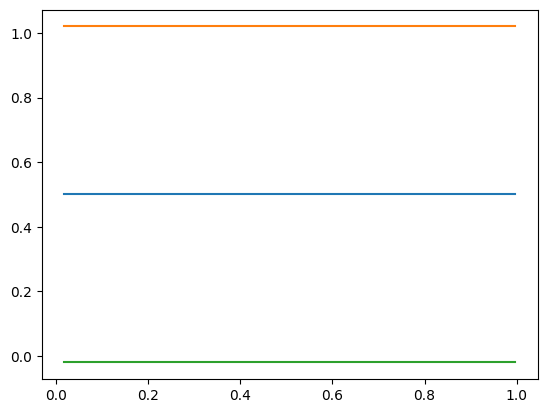

In [54]:
xdist = np.sort(st.uniform().rvs(100))
dist = model.dist(xdist)
plt.plot(xdist, dist.mean())
plt.plot(xdist, dist.isf(0.05))
plt.plot(xdist, dist.isf(0.95))
plt.show()

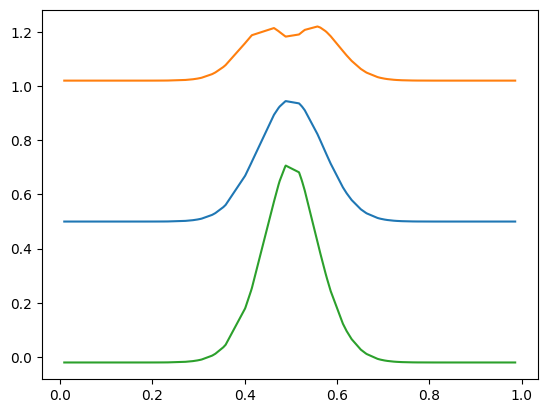

In [55]:
model.append(0.5, 1)
xdist = np.sort(st.uniform().rvs(100))
dist = model.dist(xdist)
plt.plot(xdist, dist.mean())
plt.plot(xdist, dist.isf(0.05))
plt.plot(xdist, dist.isf(0.95))
plt.show()

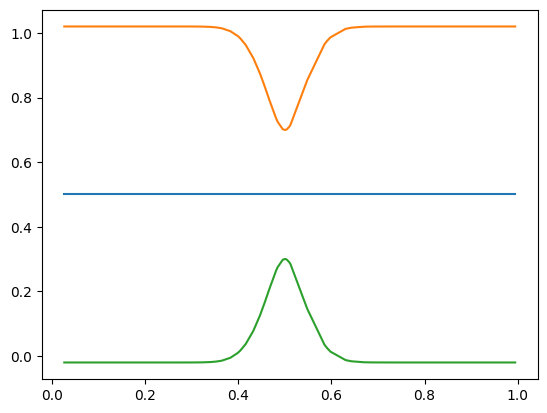

In [56]:
model.append(0.5, 0)
xdist = np.sort(st.uniform().rvs(100))
dist = model.dist(xdist)
plt.plot(xdist, dist.mean())
plt.plot(xdist, dist.isf(0.05))
plt.plot(xdist, dist.isf(0.95))
plt.show()

In [45]:
xout, yout = thompson_sampling(sample, model, n_trial=100)

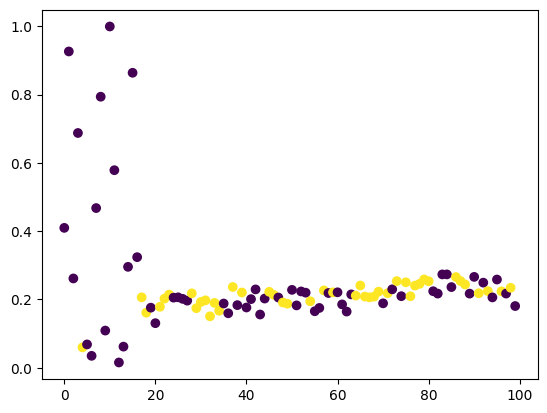

In [46]:
plt.scatter(np.arange(len(xout)), xout, c=yout)
plt.show()

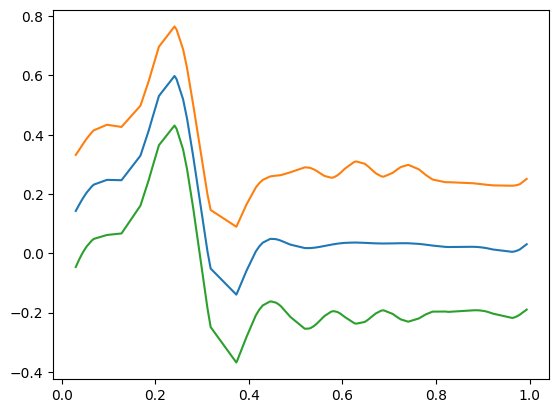

In [47]:
xdist = np.sort(st.uniform().rvs(100))
dist = model.dist(xdist)
plt.plot(xdist, dist.mean())
plt.plot(xdist, dist.isf(0.05))
plt.plot(xdist, dist.isf(0.95))
plt.show()

In [48]:
model = BP(RBF(1, 0.1))

In [49]:
xout, yout = thompson_sampling(sample, model, n_trial=100)

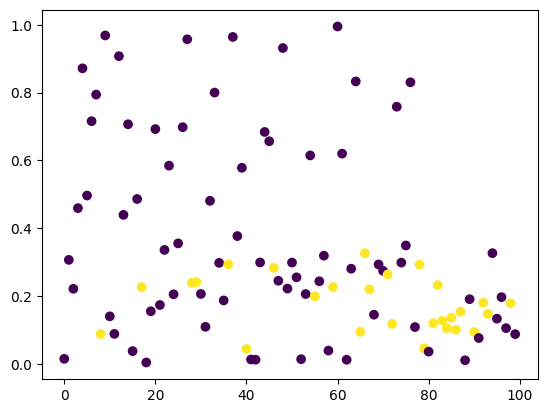

In [50]:
plt.scatter(np.arange(len(xout)), xout, c=yout)
plt.show()

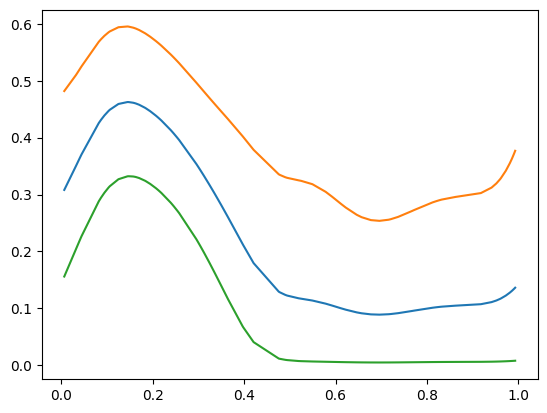

In [51]:
xdist = np.sort(st.uniform().rvs(100))
dist = model.dist(xdist)
plt.plot(xdist, dist.mean())
plt.plot(xdist, dist.isf(0.05))
plt.plot(xdist, dist.isf(0.95))
plt.show()